In [1]:
import pandas as pd
df = pd.read_csv('Cars Datasets 2025.csv', encoding='latin1')
print(df.head(10))  # Tampilkan Cars Datasets 2025.csv'

  Company Names            Cars Names      Engines CC/Battery Capacity  \
0       FERRARI         SF90 STRADALE           V8             3990 cc   
1   ROLLS ROYCE               PHANTOM          V12             6749 cc   
2          Ford                   KA+  1.2L Petrol            1,200 cc   
3      MERCEDES               GT 63 S           V8            3,982 cc   
4          AUDI            AUDI R8 Gt          V10            5,204 cc   
5           BMW          Mclaren 720s           V8            3,994 cc   
6  ASTON MARTIN            VANTAGE F1           V8            3,982 cc   
7       BENTLEY  Continental GT Azure           V8            3,996 cc   
8   LAMBORGHINI       VENENO ROADSTER          V12            6,498 cc   
9       FERRARI            F8 TRIBUTO           V8            3,900 cc   

  HorsePower Total Speed Performance(0 - 100 )KM/H      Cars Prices  \
0     963 hp    340 km/h                   2.5 sec      $1,100,000    
1     563 hp    250 km/h                   

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB
None


In [3]:
print(df.describe())

       Company Names Cars Names Engines CC/Battery Capacity HorsePower  \
count           1218       1218    1218                1215       1218   
unique            37       1201     356                 311        456   
top           Nissan    Macan T      I4            2,000 cc     355 hp   
freq             149          2      64                  31         23   

       Total Speed Performance(0 - 100 )KM/H Cars Prices Fuel Types Seats  \
count         1218                      1212        1218       1218  1218   
unique         114                       180         535         23    19   
top       250 km/h                   6.5 sec    $35,000      Petrol     5   
freq           145                        45          36        871   692   

        Torque  
count     1217  
unique     263  
top     400 Nm  
freq        72  


In [4]:
print(df.isnull().sum())

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64


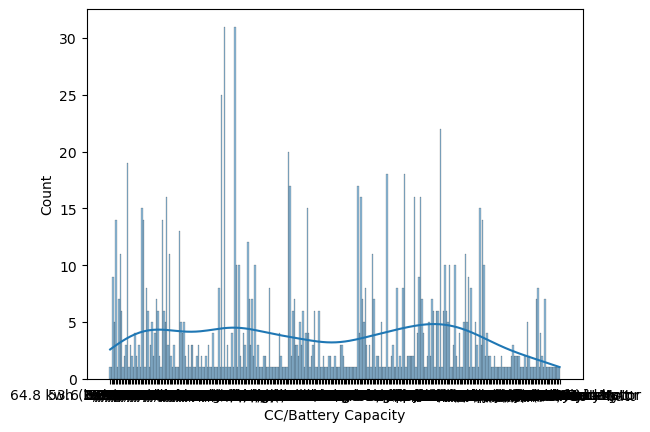

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribusi kolom numerik
sns.histplot(df['CC/Battery Capacity'], kde=True)
plt.show()

## CLEANSING AND CLEANING AN DATASET ##

In [7]:
import pandas as pd
import numpy as np

# Menyalin kolom asli agar tidak merusak data mentah
df['CC_Cleaned'] = df['CC/Battery Capacity'].copy()

# 1️⃣ Menghapus satuan 'cc' dan whitespace
df['CC_Cleaned'] = df['CC_Cleaned'].str.replace('cc', '', regex=False)
df['CC_Cleaned'] = df['CC_Cleaned'].str.strip()

# 2️⃣ Menghapus pemisah ribuan (koma atau titik)
df['CC_Cleaned'] = df['CC_Cleaned'].str.replace(',', '', regex=False)
df['CC_Cleaned'] = df['CC_Cleaned'].str.replace('.', '', regex=False)

# 3️⃣ Menangani nilai kosong atau tidak valid
df['CC_Cleaned'] = df['CC_Cleaned'].replace('', np.nan)

# 4️⃣ Mengonversi ke numerik (float)
df['CC_Cleaned'] = pd.to_numeric(df['CC_Cleaned'], errors='coerce')

# 5️⃣ Ini Opsional: Drop baris dengan nilai NaN jika ingin analisis bersih
df_cleaned = df.dropna(subset=['CC_Cleaned']).copy()

# 6️⃣ Reset index agar rapi
df_cleaned.reset_index(drop=True, inplace=True)

# 7️⃣ Cek hasil akhir
print(df_cleaned[['CC/Battery Capacity', 'CC_Cleaned']].head())

  CC/Battery Capacity  CC_Cleaned
0             3990 cc      3990.0
1             6749 cc      6749.0
2            1,200 cc      1200.0
3            3,982 cc      3982.0
4            5,204 cc      5204.0


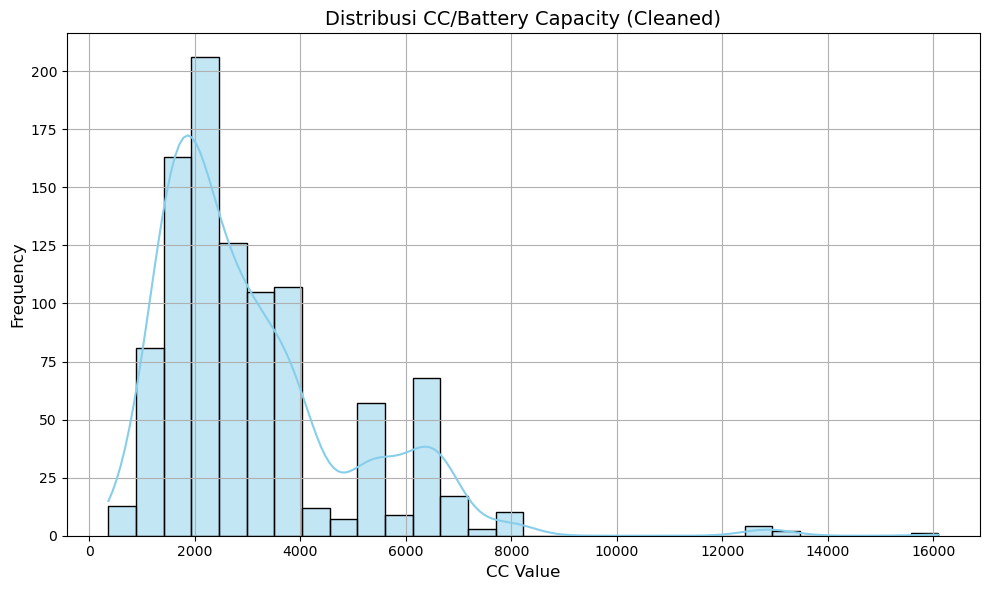

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CC_Cleaned'], kde=True, bins=30, color='skyblue')
plt.title('Distribusi CC/Battery Capacity (Cleaned)', fontsize=14)
plt.xlabel('CC Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ANALISIS DATA DISTRIBUSI #

In [10]:
# Statistik deskriptif untuk CC_Cleaned
stats = df_cleaned['CC_Cleaned'].describe()
print("📊 Statistik Deskriptif CC_Cleaned:\n")
print(stats)

📊 Statistik Deskriptif CC_Cleaned:

count      991.000000
mean      3092.876892
std       1875.736439
min        360.000000
25%       1800.000000
50%       2500.000000
75%       3799.500000
max      16100.000000
Name: CC_Cleaned, dtype: float64


In [11]:
# Menghitung IQR
q1 = df_cleaned['CC_Cleaned'].quantile(0.25)
q3 = df_cleaned['CC_Cleaned'].quantile(0.75)
iqr = q3 - q1

# Menentukan batas bawah dan atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Menyaring outlier
outliers = df_cleaned[(df_cleaned['CC_Cleaned'] < lower_bound) | (df_cleaned['CC_Cleaned'] > upper_bound)]

print("\n🚨 Outlier Detected:")
print(outliers[['CC/Battery Capacity', 'CC_Cleaned']])
print(f"\nJumlah outlier: {len(outliers)} dari total {len(df_cleaned)} baris")



🚨 Outlier Detected:
    CC/Battery Capacity  CC_Cleaned
748             7993 cc      7993.0
749             7993 cc      7993.0
750             7993 cc      7993.0
751             7993 cc      7993.0
752             7993 cc      7993.0
753             7993 cc      7993.0
754             7993 cc      7993.0
755             7993 cc      7993.0
756             7993 cc      7993.0
757             7993 cc      7993.0
758            13000 cc     13000.0
759            16100 cc     16100.0
760            12800 cc     12800.0
761            13000 cc     13000.0
762            12800 cc     12800.0
763            12800 cc     12800.0
764            12800 cc     12800.0
765             7700 cc      7700.0
846            7,300 cc      7300.0
887            7,500 cc      7500.0

Jumlah outlier: 20 dari total 991 baris


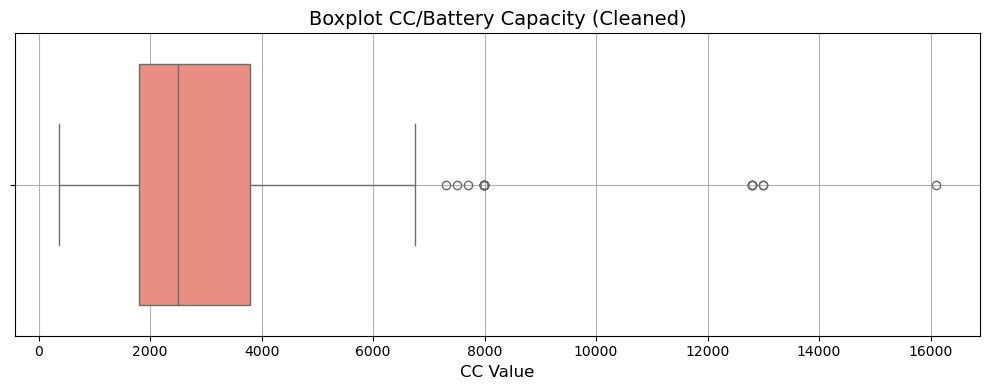

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_cleaned['CC_Cleaned'], color='salmon')
plt.title('Boxplot CC/Battery Capacity (Cleaned)', fontsize=14)
plt.xlabel('CC Value', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Filter data tanpa outlier
df_no_outliers = df_cleaned[(df_cleaned['CC_Cleaned'] >= lower_bound) & (df_cleaned['CC_Cleaned'] <= upper_bound)]

print(f"✅ Data tanpa outlier: {len(df_no_outliers)} baris")


✅ Data tanpa outlier: 971 baris


## ANALISIS LANJUTAN ##

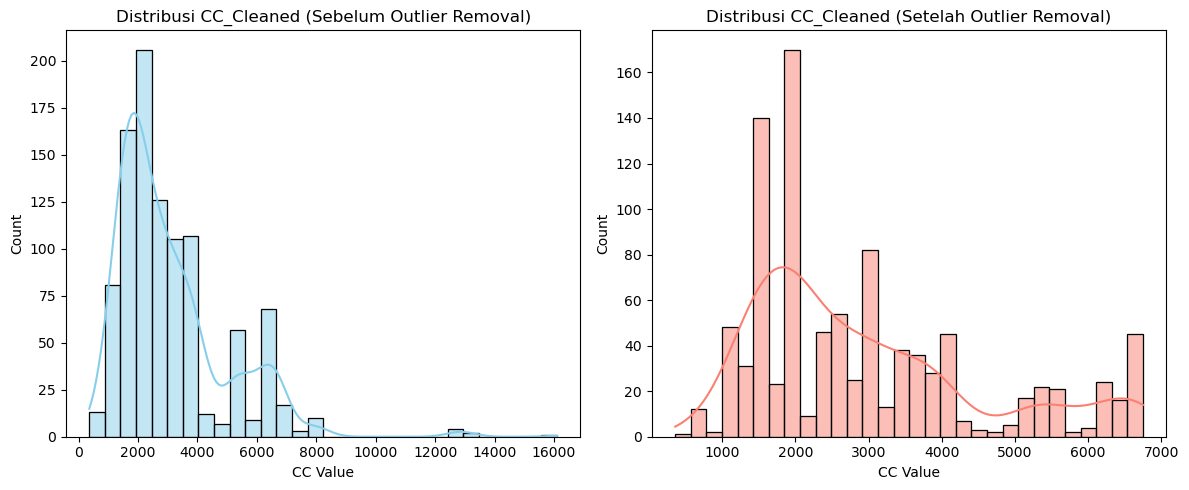

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Sebelum outlier removal
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['CC_Cleaned'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi CC_Cleaned (Sebelum Outlier Removal)")
plt.xlabel("CC Value")

# Setelah outlier removal
plt.subplot(1, 2, 2)
sns.histplot(df_no_outliers['CC_Cleaned'], bins=30, kde=True, color='salmon')
plt.title("Distribusi CC_Cleaned (Setelah Outlier Removal)")
plt.xlabel("CC Value")

plt.tight_layout()
plt.show()


In [16]:
def segment_cc(value):
    if value < 2000:
        return 'Low Capacity'
    elif value < 4000:
        return 'Mid Capacity'
    else:
        return 'High Capacity'

df_no_outliers['CC_Segment'] = df_no_outliers['CC_Cleaned'].apply(segment_cc)

# Lihat distribusi segmen
segment_counts = df_no_outliers['CC_Segment'].value_counts()
print("\n📊 Distribusi Segmen CC:")
print(segment_counts)



📊 Distribusi Segmen CC:
CC_Segment
Mid Capacity     415
Low Capacity     385
High Capacity    171
Name: count, dtype: int64


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\639390710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['CC_Segment'] = df_no_outliers['CC_Cleaned'].apply(segment_cc)


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\3071889348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CC_Segment', data=df_no_outliers, palette='Set2')


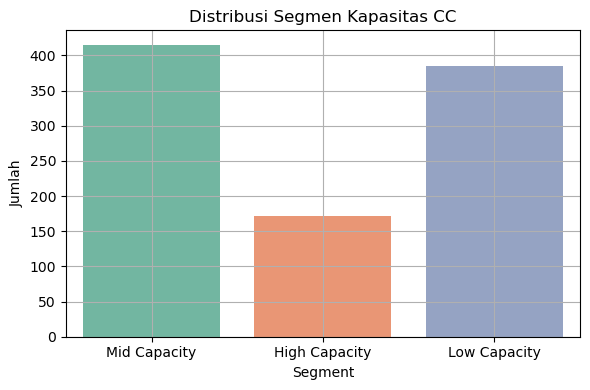

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CC_Segment', data=df_no_outliers, palette='Set2')
plt.title("Distribusi Segmen Kapasitas CC")
plt.xlabel("Segment")
plt.ylabel("Jumlah")
plt.grid(True)
plt.tight_layout()
plt.show()



🔗 Korelasi antar fitur numerik:
CC_Cleaned    1.0
Name: CC_Cleaned, dtype: float64


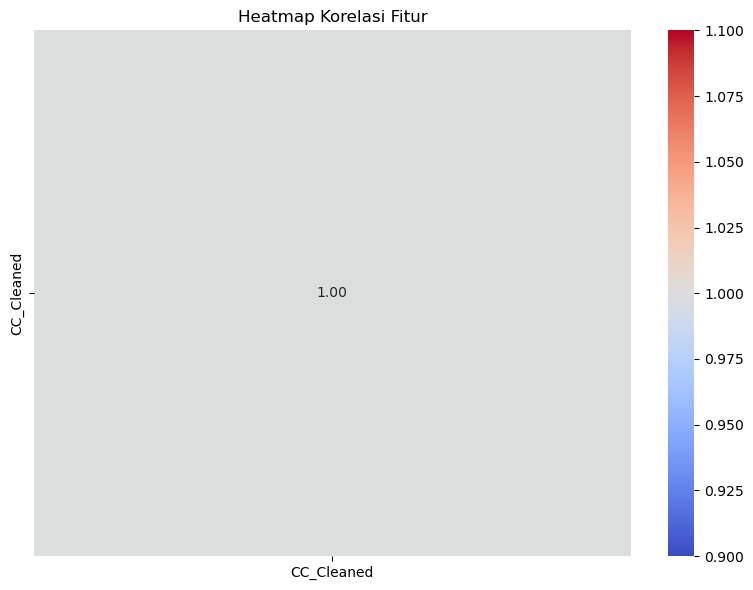

In [18]:
# Korelasi numerik
correlation = df_no_outliers.corr(numeric_only=True)
print("\n🔗 Korelasi antar fitur numerik:")
print(correlation['CC_Cleaned'].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur")
plt.tight_layout()
plt.show()

C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\837916262.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster'] = kmeans.fit_predict(X_scaled)


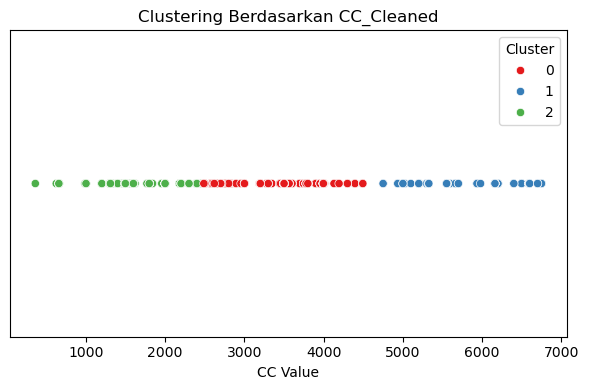

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ambil fitur numerik
X = df_no_outliers[['CC_Cleaned']]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_no_outliers['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi cluster
plt.figure(figsize=(6, 4))
sns.scatterplot(x='CC_Cleaned', y=[0]*len(df_no_outliers), hue='Cluster', data=df_no_outliers, palette='Set1')
plt.title("Clustering Berdasarkan CC_Cleaned")
plt.xlabel("CC Value")
plt.yticks([])
plt.tight_layout()
plt.show()

## Analisis Segmentasi & Clustering CC ##

In [21]:
# Crosstab untuk membandingkan hasil clustering dan segmentasi manual
comparison_table = pd.crosstab(df_no_outliers['CC_Segment'], df_no_outliers['Cluster'])
print("\n📊 Perbandingan Segmentasi Manual vs Cluster KMeans:")
print(comparison_table)


📊 Perbandingan Segmentasi Manual vs Cluster KMeans:
Cluster          0    1    2
CC_Segment                  
High Capacity   13  158    0
Low Capacity     0    0  385
Mid Capacity   337    0   78


In [22]:
# Statistik deskriptif per cluster
cluster_profile = df_no_outliers.groupby('Cluster')['CC_Cleaned'].describe()
print("\n📈 Profil Statistik per Cluster:")
print(cluster_profile)


📈 Profil Statistik per Cluster:
         count         mean         std     min      25%     50%     75%  \
Cluster                                                                    
0        350.0  3252.148571  545.237669  2480.0  2894.00  3000.0  3745.0   
1        158.0  5970.398734  606.885984  4750.0  5306.75  6181.0  6592.0   
2        463.0  1701.373650  381.180822   360.0  1497.50  1600.0  1998.0   

            max  
Cluster          
0        4494.0  
1        6749.0  
2        2438.0  


In [23]:
# Contoh visualisasi 2D jika ada fitur 'Harga'
if 'Harga' in df_no_outliers.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x='CC_Cleaned', y='Harga', hue='Cluster', data=df_no_outliers, palette='Set2')
    plt.title("Clustering Berdasarkan CC dan Harga")
    plt.xlabel("CC Value")
    plt.ylabel("Harga")
    plt.tight_layout()
    plt.show()

In [24]:
from sklearn.metrics import silhouette_score

# Hitung silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"\n📐 Silhouette Score untuk KMeans (n=3): {score:.4f}")


📐 Silhouette Score untuk KMeans (n=3): 0.6480


C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

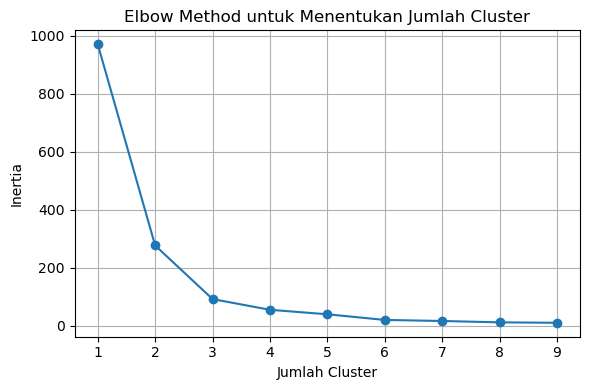

In [25]:
# Elbow Method untuk menentukan jumlah cluster optimal
inertia_values = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia_values, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode segmentasi CC menjadi numerik
le = LabelEncoder()
df_no_outliers['CC_Segment_Encoded'] = le.fit_transform(df_no_outliers['CC_Segment'])

print("\n🔢 Encoding Segmentasi CC:")
print(df_no_outliers[['CC_Segment', 'CC_Segment_Encoded']].head())



🔢 Encoding Segmentasi CC:
      CC_Segment  CC_Segment_Encoded
0   Mid Capacity                   2
1  High Capacity                   0
2   Low Capacity                   1
3   Mid Capacity                   2
4  High Capacity                   0


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\2598864158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['CC_Segment_Encoded'] = le.fit_transform(df_no_outliers['CC_Segment'])


## Evaluasi & Strategi Segmentasi CC ##

In [28]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, classification_report

# Evaluasi kesesuaian cluster vs segmentasi manual
ari = adjusted_rand_score(df_no_outliers['CC_Segment_Encoded'], df_no_outliers['Cluster'])
nmi = normalized_mutual_info_score(df_no_outliers['CC_Segment_Encoded'], df_no_outliers['Cluster'])

print(f"✅ Adjusted Rand Index (ARI): {ari:.4f}")
print(f"✅ Normalized Mutual Info (NMI): {nmi:.4f}")

# Confusion matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(df_no_outliers['CC_Segment_Encoded'], df_no_outliers['Cluster']))

# Classification report
print("\n📋 Classification Report:")
print(classification_report(df_no_outliers['CC_Segment_Encoded'], df_no_outliers['Cluster']))


✅ Adjusted Rand Index (ARI): 0.7163
✅ Normalized Mutual Info (NMI): 0.7431

📊 Confusion Matrix:
[[ 13 158   0]
 [  0   0 385]
 [337   0  78]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.08      0.05       171
           1       0.00      0.00      0.00       385
           2       0.17      0.19      0.18       415

    accuracy                           0.09       971
   macro avg       0.07      0.09      0.08       971
weighted avg       0.08      0.09      0.08       971



C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\282888184.py:11: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


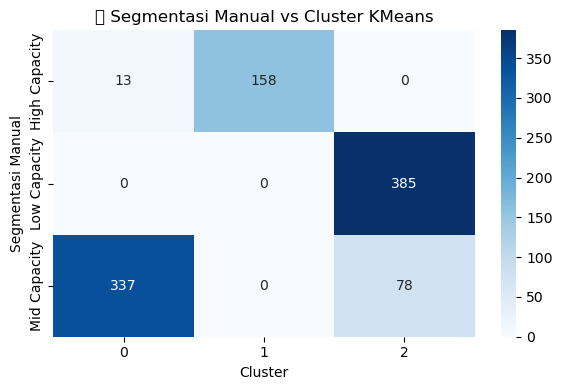

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab heatmap
ct = pd.crosstab(df_no_outliers['CC_Segment'], df_no_outliers['Cluster'])
plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Segmentasi Manual vs Cluster KMeans")
plt.ylabel("Segmentasi Manual")
plt.xlabel("Cluster")
plt.tight_layout()
plt.show()


In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Cek jumlah fitur
if X_scaled.shape[1] >= 2:
    # PCA untuk reduksi dimensi
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot hasil PCA
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_no_outliers['Cluster'], palette='Set2')
    plt.title("📊 Visualisasi Cluster dengan PCA")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ PCA tidak bisa dijalankan karena jumlah fitur < 2. Tambahkan fitur lain ke X_scaled.")


⚠️ PCA tidak bisa dijalankan karena jumlah fitur < 2. Tambahkan fitur lain ke X_scaled.


In [31]:
# Statistik deskriptif per cluster
cluster_profile = df_no_outliers.groupby('Cluster')['CC_Cleaned'].describe()
print("\n📈 Profil Statistik per Cluster:")
print(cluster_profile)



📈 Profil Statistik per Cluster:
         count         mean         std     min      25%     50%     75%  \
Cluster                                                                    
0        350.0  3252.148571  545.237669  2480.0  2894.00  3000.0  3745.0   
1        158.0  5970.398734  606.885984  4750.0  5306.75  6181.0  6592.0   
2        463.0  1701.373650  381.180822   360.0  1497.50  1600.0  1998.0   

            max  
Cluster          
0        4494.0  
1        6749.0  
2        2438.0  


In [32]:
# Buat ringkasan strategi berdasarkan cluster
strategi = {
    0: "📦 Mid Capacity → Upselling potensial, edukasi produk, segmentasi ulang",
    1: "💎 High Capacity → Retensi pelanggan, loyalty program, layanan premium",
    2: "🔧 Low Capacity → Efisiensi biaya, churn prevention, edukasi nilai produk"
}

print("\n🎯 Rekomendasi Strategi Bisnis per Cluster:")
for cluster_id, s in strategi.items():
    print(f"Cluster {cluster_id}: {s}")



🎯 Rekomendasi Strategi Bisnis per Cluster:
Cluster 0: 📦 Mid Capacity → Upselling potensial, edukasi produk, segmentasi ulang
Cluster 1: 💎 High Capacity → Retensi pelanggan, loyalty program, layanan premium
Cluster 2: 🔧 Low Capacity → Efisiensi biaya, churn prevention, edukasi nilai produk


In [33]:
# Simpan label cluster ke dataframe
df_no_outliers['Cluster_Label'] = df_no_outliers['Cluster']
# Bisa disimpan ke file CSV jika perlu
df_no_outliers.to_csv("hasil_segmentasi.csv", index=False)

C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\1787423959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Cluster_Label'] = df_no_outliers['Cluster']


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\491889230.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


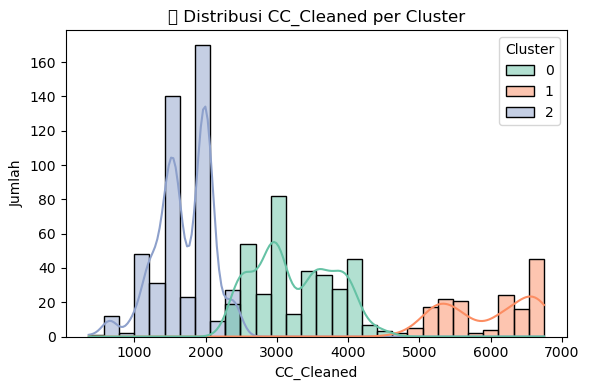

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df_no_outliers, x='CC_Cleaned', hue='Cluster', palette='Set2', bins=30, kde=True)
plt.title("📊 Distribusi CC_Cleaned per Cluster")
plt.xlabel("CC_Cleaned")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()


## Implementasi strategis berdasarkan hasil segmentasi ##

In [36]:
# Buat salinan eksplisit agar aman dari SettingWithCopyWarning
df_no_outliers = df_no_outliers.copy()

# Tambahkan label deskriptif ke cluster
cluster_map = {
    0: "Mid Capacity",
    1: "High Capacity",
    2: "Low Capacity"
}
df_no_outliers['Cluster_Desc'] = df_no_outliers['Cluster_Label'].map(cluster_map)

# Simpan ke CSV untuk integrasi sistem atau CRM
df_no_outliers.to_csv("hasil_segmentasi_lanjutan.csv", index=False)


In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "4"  # Hindari memory leak di Windows MKL

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Fungsi update cluster dengan copy aman
def update_clusters(df, feature_cols, n_clusters=3):
    df = df.copy()  # Hindari SettingWithCopyWarning
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[feature_cols])
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    return df

# Contoh pemanggilan
feature_cols = ['CC_Cleaned']  # Tambahkan fitur lain jika tersedia
df_no_outliers = update_clusters(df_no_outliers, feature_cols)


C:\Users\Harbangan Panjaitan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


2025-08-03 14:19:18.349 
  command:

    streamlit run C:\Users\Harbangan Panjaitan\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

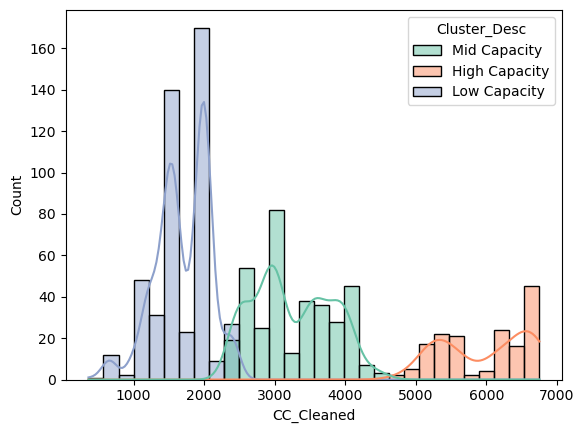

In [38]:
# Simpan sebagai streamlit_app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("hasil_segmentasi_lanjutan.csv")

st.title("📊 Dashboard Segmentasi Pelanggan")

# Distribusi per cluster
st.subheader("Distribusi CC_Cleaned per Cluster")
fig, ax = plt.subplots()
sns.histplot(data=df, x='CC_Cleaned', hue='Cluster_Desc', bins=30, kde=True, palette='Set2', ax=ax)
st.pyplot(fig)

# Statistik per cluster
st.subheader("Statistik Deskriptif per Cluster")
st.dataframe(df.groupby('Cluster_Desc')['CC_Cleaned'].describe())


In [39]:
# Tambahkan kolom strategi berdasarkan nilai CC_Cleaned
def assign_strategy(row):
    if row['CC_Cleaned'] < 2000:
        return "Edukasi & Onboarding"
    elif row['CC_Cleaned'] < 4500:
        return "Upselling & Loyalty"
    else:
        return "Premium & Retensi"

df_no_outliers['Strategi_Aksi'] = df_no_outliers.apply(assign_strategy, axis=1)


## Implementasi strategis lanjutan ## 

In [75]:
# Simpan sebagai streamlit_app.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("hasil_segmentasi_lanjutan.csv")

# Tambahkan kolom strategi aksi
def assign_strategy(row):
    if row['CC_Cleaned'] < 2000:
        return "Edukasi & Onboarding"
    elif row['CC_Cleaned'] < 4500:
        return "Upselling & Loyalty"
    else:
        return "Premium & Retensi"

df['Strategi_Aksi'] = df.apply(assign_strategy, axis=1)

# Judul dashboard
st.title("📊 Dashboard Segmentasi & Strategi Pelanggan")

# 1. Distribusi CC_Cleaned per Cluster
st.subheader("Distribusi CC_Cleaned per Cluster")
fig1, ax1 = plt.subplots()
sns.histplot(data=df, x='CC_Cleaned', hue='Cluster_Desc', bins=30, kde=True, palette='Set2', ax=ax1)
st.pyplot(fig1)

# 2. Statistik Deskriptif per Cluster
st.subheader("Statistik Deskriptif per Cluster")
st.dataframe(df.groupby('Cluster_Desc')['CC_Cleaned'].describe())

# 3. Distribusi Strategi Aksi
st.subheader("Distribusi Strategi Aksi")
fig2, ax2 = plt.subplots()
sns.countplot(data=df, x='Strategi_Aksi', palette='Set2', ax=ax2)
st.pyplot(fig2)

# 4. Strategi Aksi per Cluster
st.subheader("Strategi Aksi per Cluster")
pivot_table = pd.crosstab(df['Cluster_Desc'], df['Strategi_Aksi'])
st.dataframe(pivot_table)

# 5. Visualisasi Strategi Aksi per Cluster
st.subheader("Visualisasi Strategi Aksi per Cluster")
fig3, ax3 = plt.subplots()
sns.countplot(data=df, x='Strategi_Aksi', hue='Cluster_Desc', palette='Set2', ax=ax3)
st.pyplot(fig3)

# 6. Tombol Unduh Data Final
st.subheader("📥 Unduh Data Segmentasi Final")
csv = df.to_csv(index=False).encode('utf-8')
st.download_button("Unduh CSV", data=csv, file_name="segmentasi_final.csv", mime='text/csv')


C:\Users\Harbangan Panjaitan\AppData\Local\Temp\ipykernel_10720\2202679793.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Strategi_Aksi', palette='Set2', ax=ax2)


False